In [1]:
import numpy as np
from matplotlib.colors import LogNorm

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import mdtraj
import math
import simtk.unit as unit
import sys
from sys import exit

import pickle
import argparse
import torch

from iap2022 import utils

## Load The Trajectory Files

In [2]:
traj_list = []

for idx in range(1):
    traj = mdtraj.load_dcd(f"./data/traj_{idx}.dcd", top = "./data/init1.pdb")
    traj_list.append(traj)

In [3]:
print(traj[1])

<mdtraj.Trajectory with 1 frames, 1996 atoms, 661 residues, and unitcells>


In [4]:
total_traj = mdtraj.join(traj_list[0:625])
psis, phis = [], []

In [5]:
psis.append(mdtraj.compute_dihedrals(total_traj, [[4, 6, 8, 14]]))
phis.append(mdtraj.compute_dihedrals(total_traj, [[6, 8, 14, 16]]))

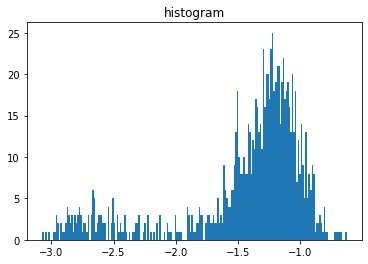

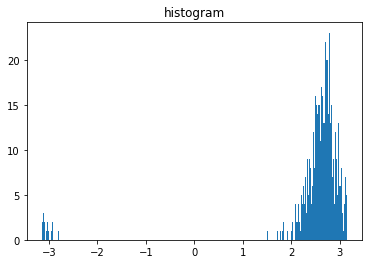

In [6]:
plt.hist(psis[0], bins = 200) 
plt.title("histogram") 
plt.show()

plt.hist(phis[0], bins = 600) 
plt.title("histogram") 
plt.show()

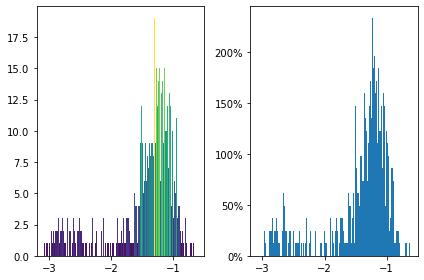

In [7]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(psis[0], bins=300)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(psis[0], bins=300, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [8]:
psis = np.reshape(psis[0], (1000,))
phis = np.reshape(phis[0], (1000,))

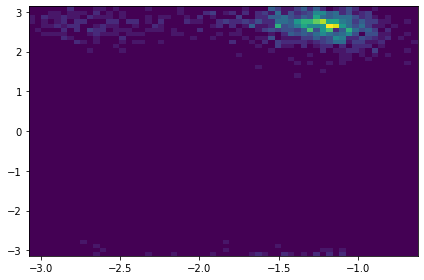

In [9]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(psis, phis, bins = 60)